In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate

In [53]:
df = pd.read_csv('/kaggle/input/dog-breed-identification/labels.csv')
train = "/kaggle/input/dog-breed-identification/train"

In [54]:
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [56]:
print("Total number of unique Dog Breeds :",len(df.breed.unique()))

Total number of unique Dog Breeds : 120


In [57]:
df.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


In [59]:
lab = df["breed"].unique().tolist()
print(lab)

['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever', 'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound', 'shetland_sheepdog', 'walker_hound', 'maltese_dog', 'norfolk_terrier', 'african_hunting_dog', 'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer', 'doberman', 'otterhound', 'standard_schnauzer', 'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn', 'affenpinscher', 'labrador_retriever', 'ibizan_hound', 'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael', 'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier', 'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz', 'german_shepherd', 'greater_swiss_mountain_dog', 'basset', 'australian_terrier', 'schipperke', 'rhodesian_ridgeback', 'irish_setter', 'appenzeller', 'bloodhound', 'samoyed', 'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon', 'border_collie', 'entlebucher', 'collie', 'malamute', 'welsh_springer_spaniel', 'chihuahua', 'saluki', 'pug', 'malino

In [64]:
categorical_columns = ['id', 'breed']

In [61]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(categorical_columns)
encoded_data = label_encoder.transform(categorical_columns)
original_data = label_encoder.inverse_transform(encoded_data)
print(encoded_data)

[1 0]


In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(categorical_columns)
list(categorical_columns)
le.transform(categorical_columns)

array([1, 0])

In [63]:
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [71]:
df['image_file'] = df['id'].apply(lambda x: x + ".jpg")
df.head()

,id,breed,image_file
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,000bec180eb18c7604dcecc8fe0dba07.jpg
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,001513dfcb2ffafc82cccf4d8bbaba97.jpg
2,001cdf01b096e06d78e9e5112d419397,pekinese,001cdf01b096e06d78e9e5112d419397.jpg
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,00214f311d5d2247d5dfe4fe24b2303d.jpg
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,0021f9ceb3235effd7fcde7f7538ed62.jpg


In [72]:
def read_and_resize_image_rgb(file_path):
    img = cv2.imread(file_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    img_rgb_resized = cv2.resize(img_rgb, (224, 224))
    return img_rgb_resized

In [73]:
import os
resized_images = []
for idx, filename in enumerate(df['image_file']):
    img_path = os.path.join(train, filename)
    resized_img = read_and_resize_image_rgb(img_path)
    resized_images.append(resized_img)
resized_images_array = np.array(resized_images)

TypeError: string indices must be integers

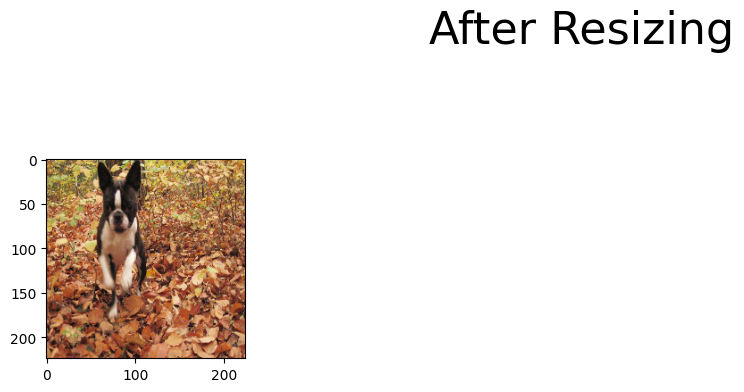

In [74]:
nrow = 5
ncol = 4
fig1 = plt.figure(figsize=(15, 15))
fig1.suptitle('After Resizing', size=32)
for i in range(20):
    plt.subplot(nrow, ncol, i + 1)
    plt.imshow(resized_images[i])
    plt.title('class = {x}, Ship is {y}'.format(x=train["category"][i], y=ship_categories[train["category"][i]]))
    plt.axis('Off')
    plt.grid(False)
plt.show()

In [22]:
import tensorflow as tf
from keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras import datasets, layers, models
from tensorflow.math import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
import os
import cv2
import warnings
warnings.filterwarnings('ignore')

refactor_size = 128
resized_images = []
all_paths = []

for i in range(len(train)):
    image_path = os.path.join(train, train["train"][i])
    img = tf.keras.utils.load_img(image_path, target_size=(refactor_size, refactor_size))
    img_vals = tf.image.convert_image_dtype(img, tf.float32)
    imgarr = tf.keras.utils.img_to_array(img_vals)
    resized_image_list.append(imgarr)
    all_paths.append(image_path)

resized_image_list = np.asarray(resized_images)

TypeError: string indices must be integers

In [23]:
import numpy as np
from tensorflow.keras.applications.mobilenet import preprocess_input
image_size = 200
train_data=np.zeros((len(df),image_size,image_size,3),dtype="float32")
for i,img_id in enumerate(df["image_file"]):
    img=cv2.resize(cv2.imread(train+img_id,cv2.IMREAD_COLOR),((image_size,image_size)))
    img_array=preprocess_input(np.expand_dims(np.array(img[...,: : -1].astype(np.float32)).copy(),axis=0))
    train_data[i]=img_array

[ WARN:0@2056.964] global loadsave.cpp:248 findDecoder imread_('/kaggle/input/dog-breed-identification/train000bec180eb18c7604dcecc8fe0dba07.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [24]:
train_data[i]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [25]:
lab = df["breed"].unique().tolist()
print(lab)

['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever', 'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound', 'shetland_sheepdog', 'walker_hound', 'maltese_dog', 'norfolk_terrier', 'african_hunting_dog', 'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer', 'doberman', 'otterhound', 'standard_schnauzer', 'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn', 'affenpinscher', 'labrador_retriever', 'ibizan_hound', 'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael', 'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier', 'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz', 'german_shepherd', 'greater_swiss_mountain_dog', 'basset', 'australian_terrier', 'schipperke', 'rhodesian_ridgeback', 'irish_setter', 'appenzeller', 'bloodhound', 'samoyed', 'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon', 'border_collie', 'entlebucher', 'collie', 'malamute', 'welsh_springer_spaniel', 'chihuahua', 'saluki', 'pug', 'malino

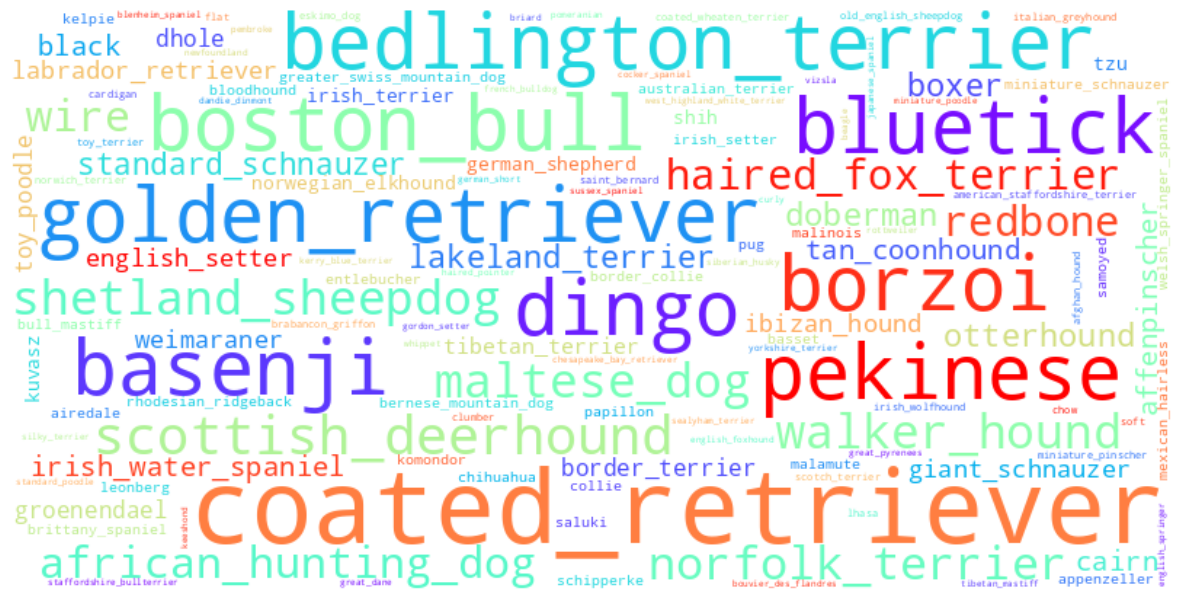

In [30]:
from wordcloud import WordCloud
text = ' '.join(lab)
wordcloud = WordCloud(width=800, height=400, background_color='white',colormap="rainbow").generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [33]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
label_data = encoder.fit_transform(df["breed"].values)
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(train_data,label_data,test_size=0.2,random_state=42)

In [36]:
print("Train Data Shape :",x_train.shape)
print("Test Data Shape :",x_test.shape)
print("Train Label Data Shape :",y_train.shape)
print("Test Label Data Shape :",y_test.shape)

Train Data Shape : (8177, 200, 200, 3)
Test Data Shape : (2045, 200, 200, 3)
Train Label Data Shape : (8177,)
Test Label Data Shape : (2045,)


In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 32
train_datagen = ImageDataGenerator(rotation_range=45,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.25,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow(x_train, 
                                     y_train, 
                                     batch_size=batch_size)

test_datagen = ImageDataGenerator()
 
test_generator = test_datagen.flow(x_test, 
                                   y_test, 
                                   batch_size=batch_size)

In [40]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
import tensorflow as tf
num_breed = 120

resnet = ResNet50V2(input_shape = [image_size,image_size,3], weights='imagenet', include_top=False)
for layer in resnet.layers:
    layer.trainable = False
x = resnet.output
x = BatchNormalization()(x)
x = GlobalAveragePooling2D()(x)
# x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
# x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
prediction = Dense(num_breed, activation='softmax')(x)
model = Model(inputs=resnet.input, outputs=prediction)

learning_rate = 1e-3
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=["accuracy"])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 206, 206, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 100, 100, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 102, 102, 64)         0         ['conv1_conv[0][0]']          
                                                                                              

In [42]:
history = model.fit(train_generator,steps_per_epoch= x_train.shape[0] // batch_size,epochs=5,
                 validation_data= test_generator,
                 validation_steps= x_test.shape[0] // batch_size)

Epoch 1/5
255/255 [==============================] - 72s 282ms/step - loss: 4.7876 - accuracy: 0.0087 - val_loss: 4.7852 - val_accuracy: 0.0109
Epoch 2/5
255/255 [==============================] - 71s 279ms/step - loss: 4.7827 - accuracy: 0.0112 - val_loss: 4.7842 - val_accuracy: 0.0099
Epoch 3/5
255/255 [==============================] - 71s 278ms/step - loss: 4.7809 - accuracy: 0.0113 - val_loss: 4.7845 - val_accuracy: 0.0099
Epoch 4/5
255/255 [==============================] - 72s 281ms/step - loss: 4.7798 - accuracy: 0.0110 - val_loss: 4.7837 - val_accuracy: 0.0099
Epoch 5/5
255/255 [==============================] - 71s 278ms/step - loss: 4.7791 - accuracy: 0.0120 - val_loss: 4.7842 - val_accuracy: 0.0099


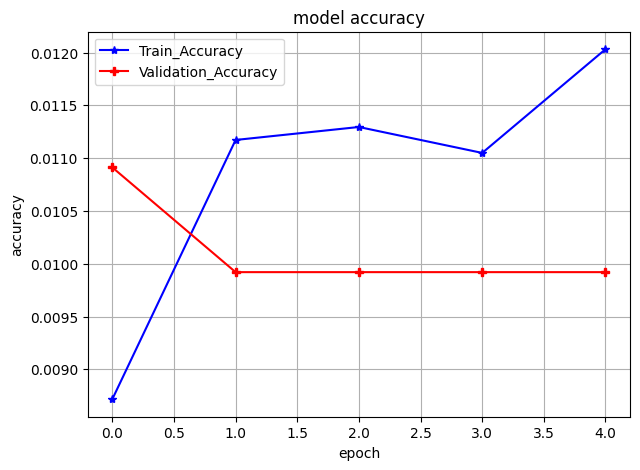

In [43]:
plt.figure(figsize=(7,5))
plt.plot(history.history['accuracy'],label="Train_Accuracy",color="blue",marker="*")
plt.plot(history.history['val_accuracy'],label="Validation_Accuracy",color="red",marker="P")
plt.grid(True)
plt.legend()
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

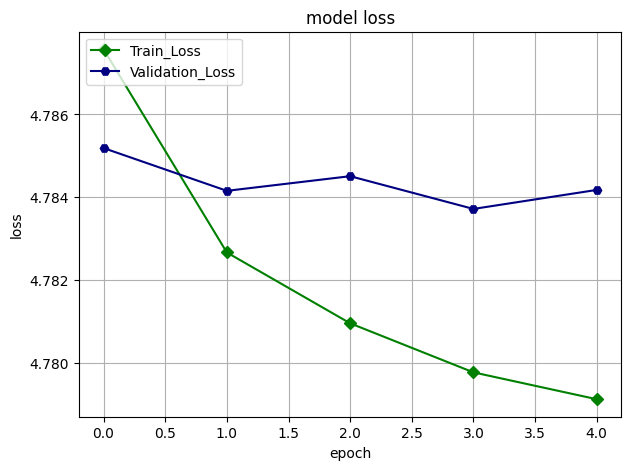

In [44]:
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'],color="green",marker="D")
plt.plot(history.history['val_loss'],color="navy",marker="H")
plt.grid(True)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train_Loss', 'Validation_Loss'], loc='upper left')
plt.show()

64/64 [==============================] - 5s 58ms/step


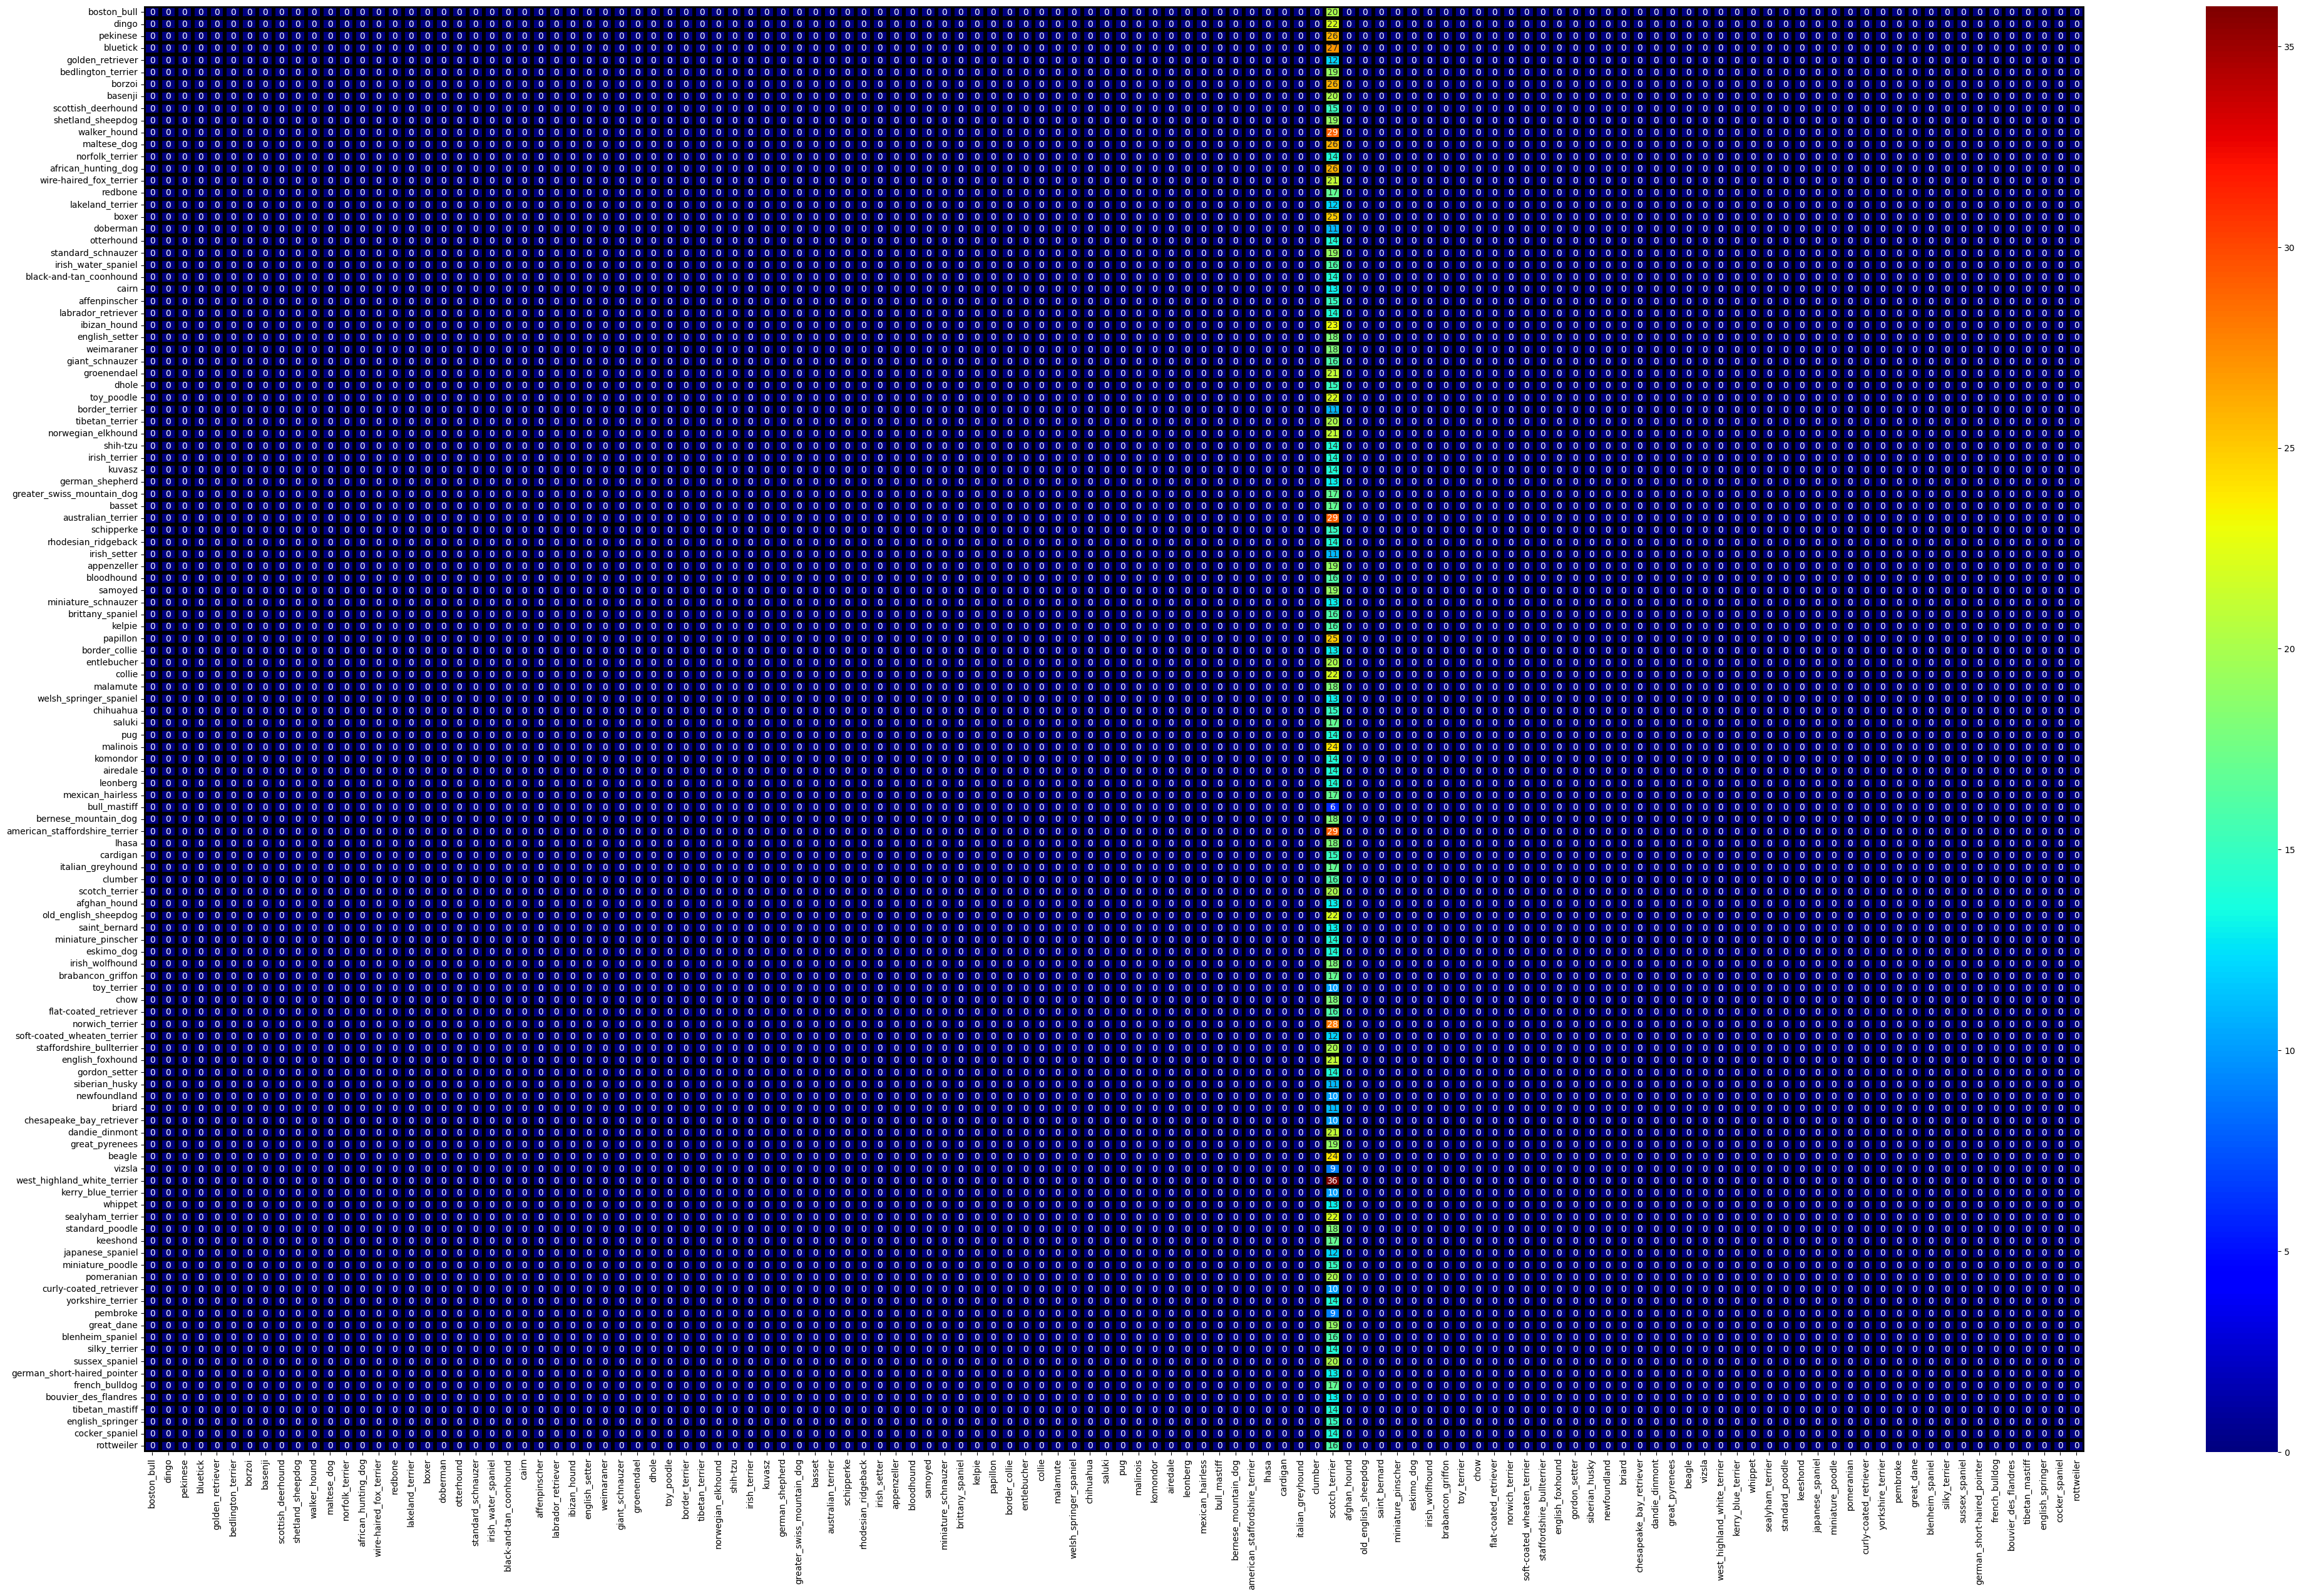

In [45]:
pre=model.predict(x_test)
predict=np.argmax(pre,axis=1)

from sklearn.metrics import confusion_matrix, classification_report
plt.figure(figsize=(50,30))
cf=confusion_matrix(y_test,predict)
sns.heatmap(cf,annot=True,fmt="d",cmap="jet",lw=4,linecolor="black",xticklabels=lab,yticklabels=lab)
plt.show()

In [46]:
print(classification_report(y_test,predict,target_names=lab))

                                precision    recall  f1-score   support

                   boston_bull       0.00      0.00      0.00        20
                         dingo       0.00      0.00      0.00        22
                      pekinese       0.00      0.00      0.00        26
                      bluetick       0.00      0.00      0.00        27
              golden_retriever       0.00      0.00      0.00        12
            bedlington_terrier       0.00      0.00      0.00        19
                        borzoi       0.00      0.00      0.00        26
                       basenji       0.00      0.00      0.00        20
            scottish_deerhound       0.00      0.00      0.00        15
             shetland_sheepdog       0.00      0.00      0.00        19
                  walker_hound       0.00      0.00      0.00        29
                   maltese_dog       0.00      0.00      0.00        26
               norfolk_terrier       0.00      0.00      0.00  

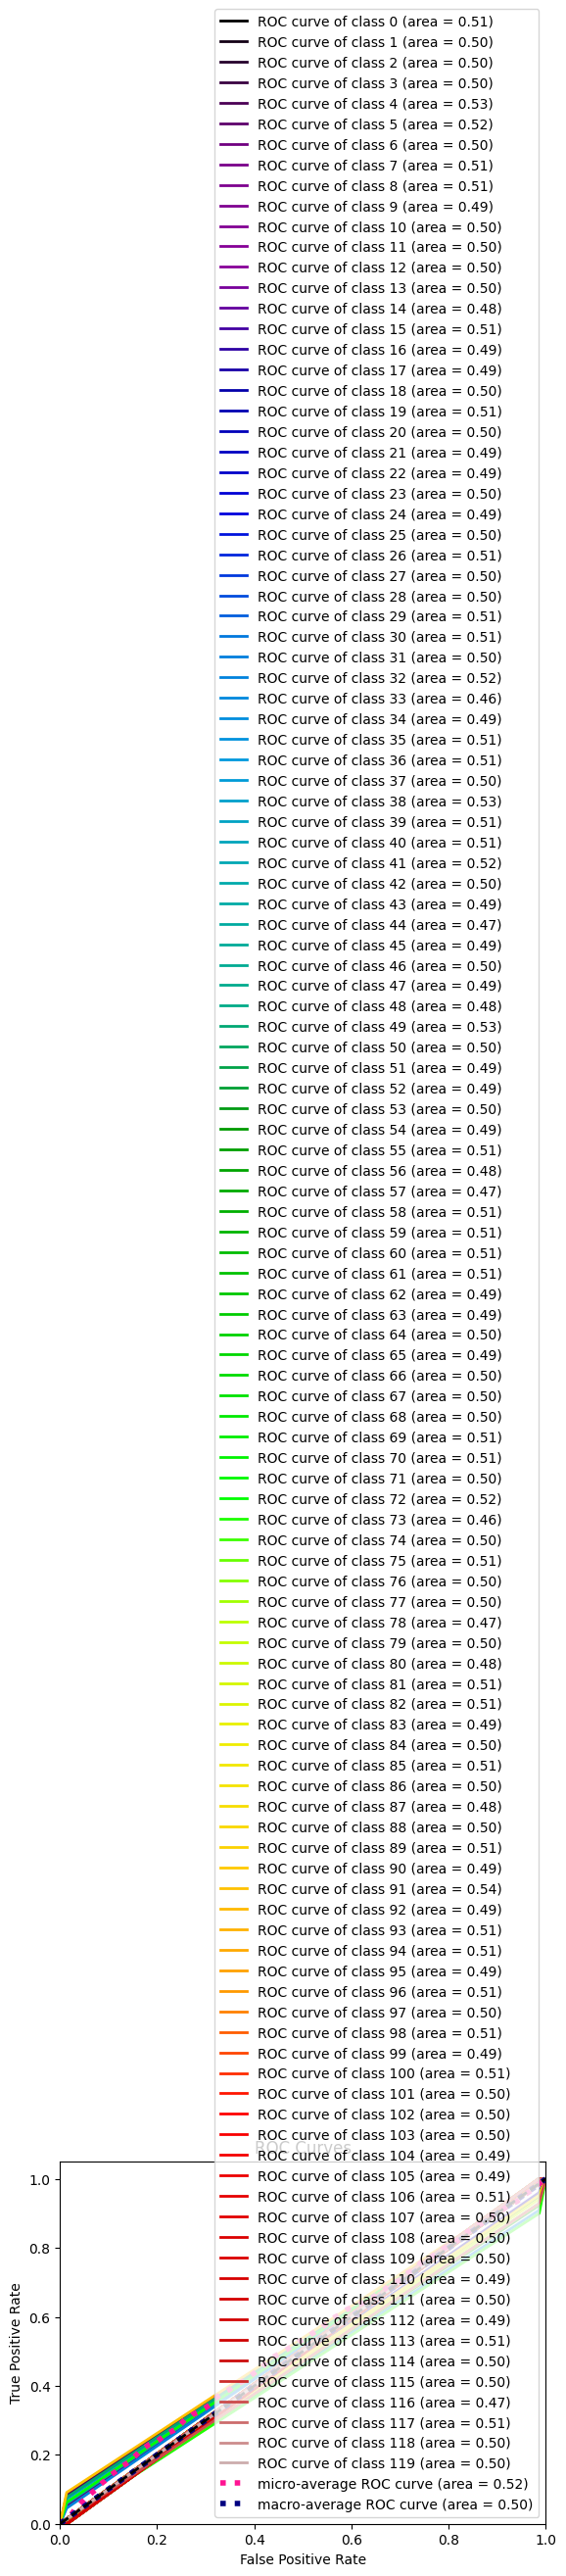

In [47]:
import scikitplot as skplt

skplt.metrics.plot_roc(y_test, pre)
plt.show()

<Figure size 2000x1500 with 0 Axes>

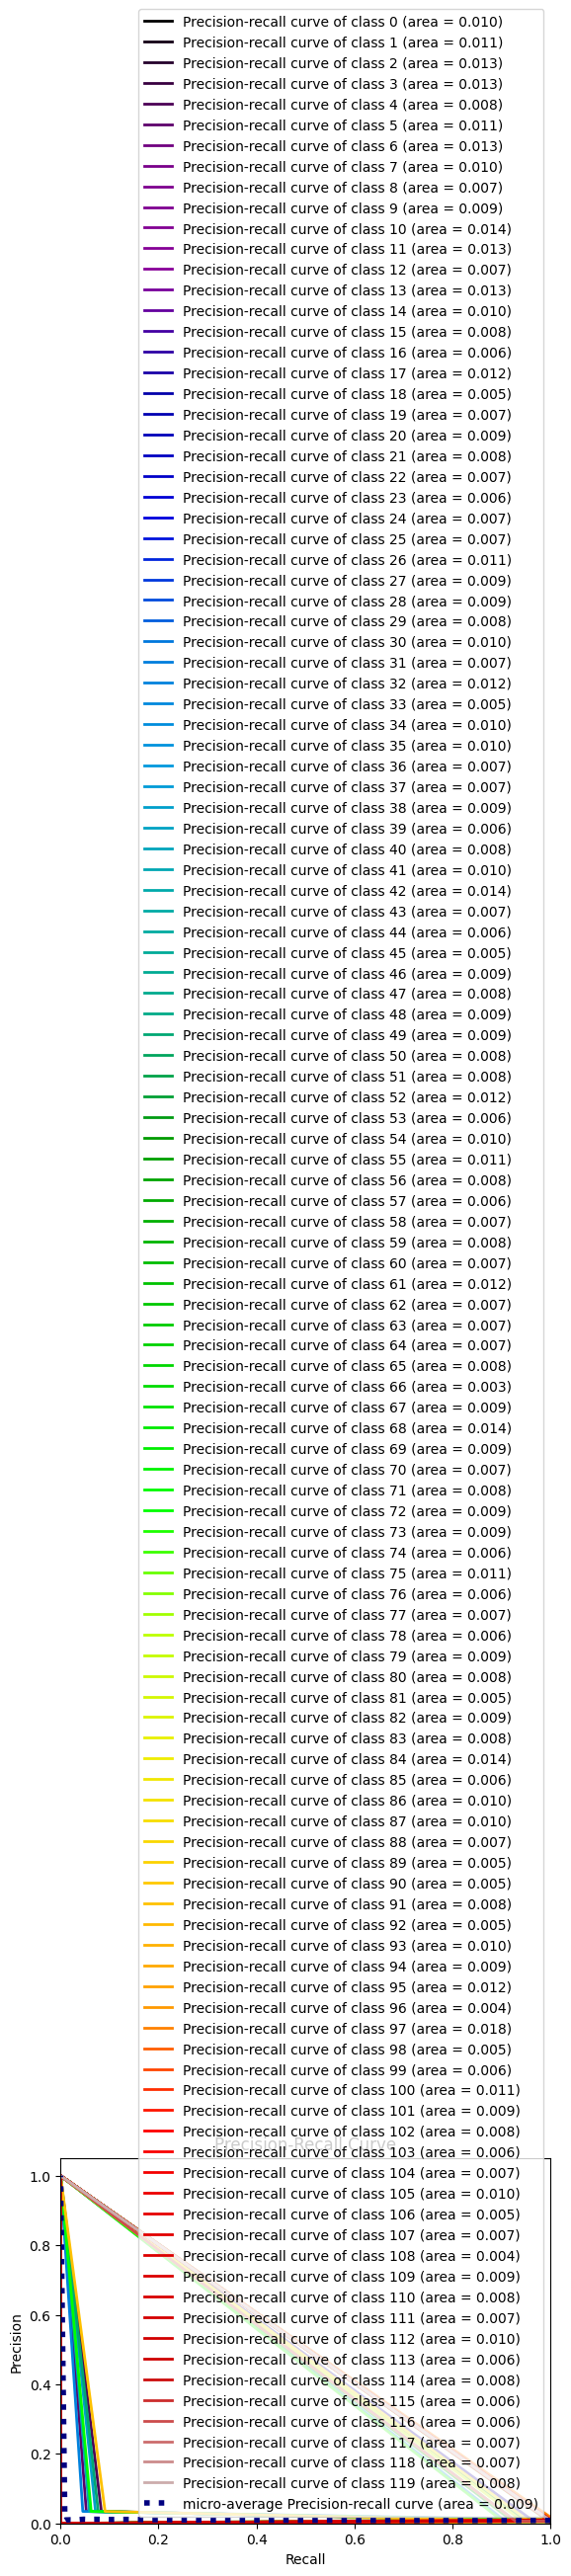

In [48]:
plt.figure(figsize=(20,15))
skplt.metrics.plot_precision_recall(y_test, pre)
plt.show()

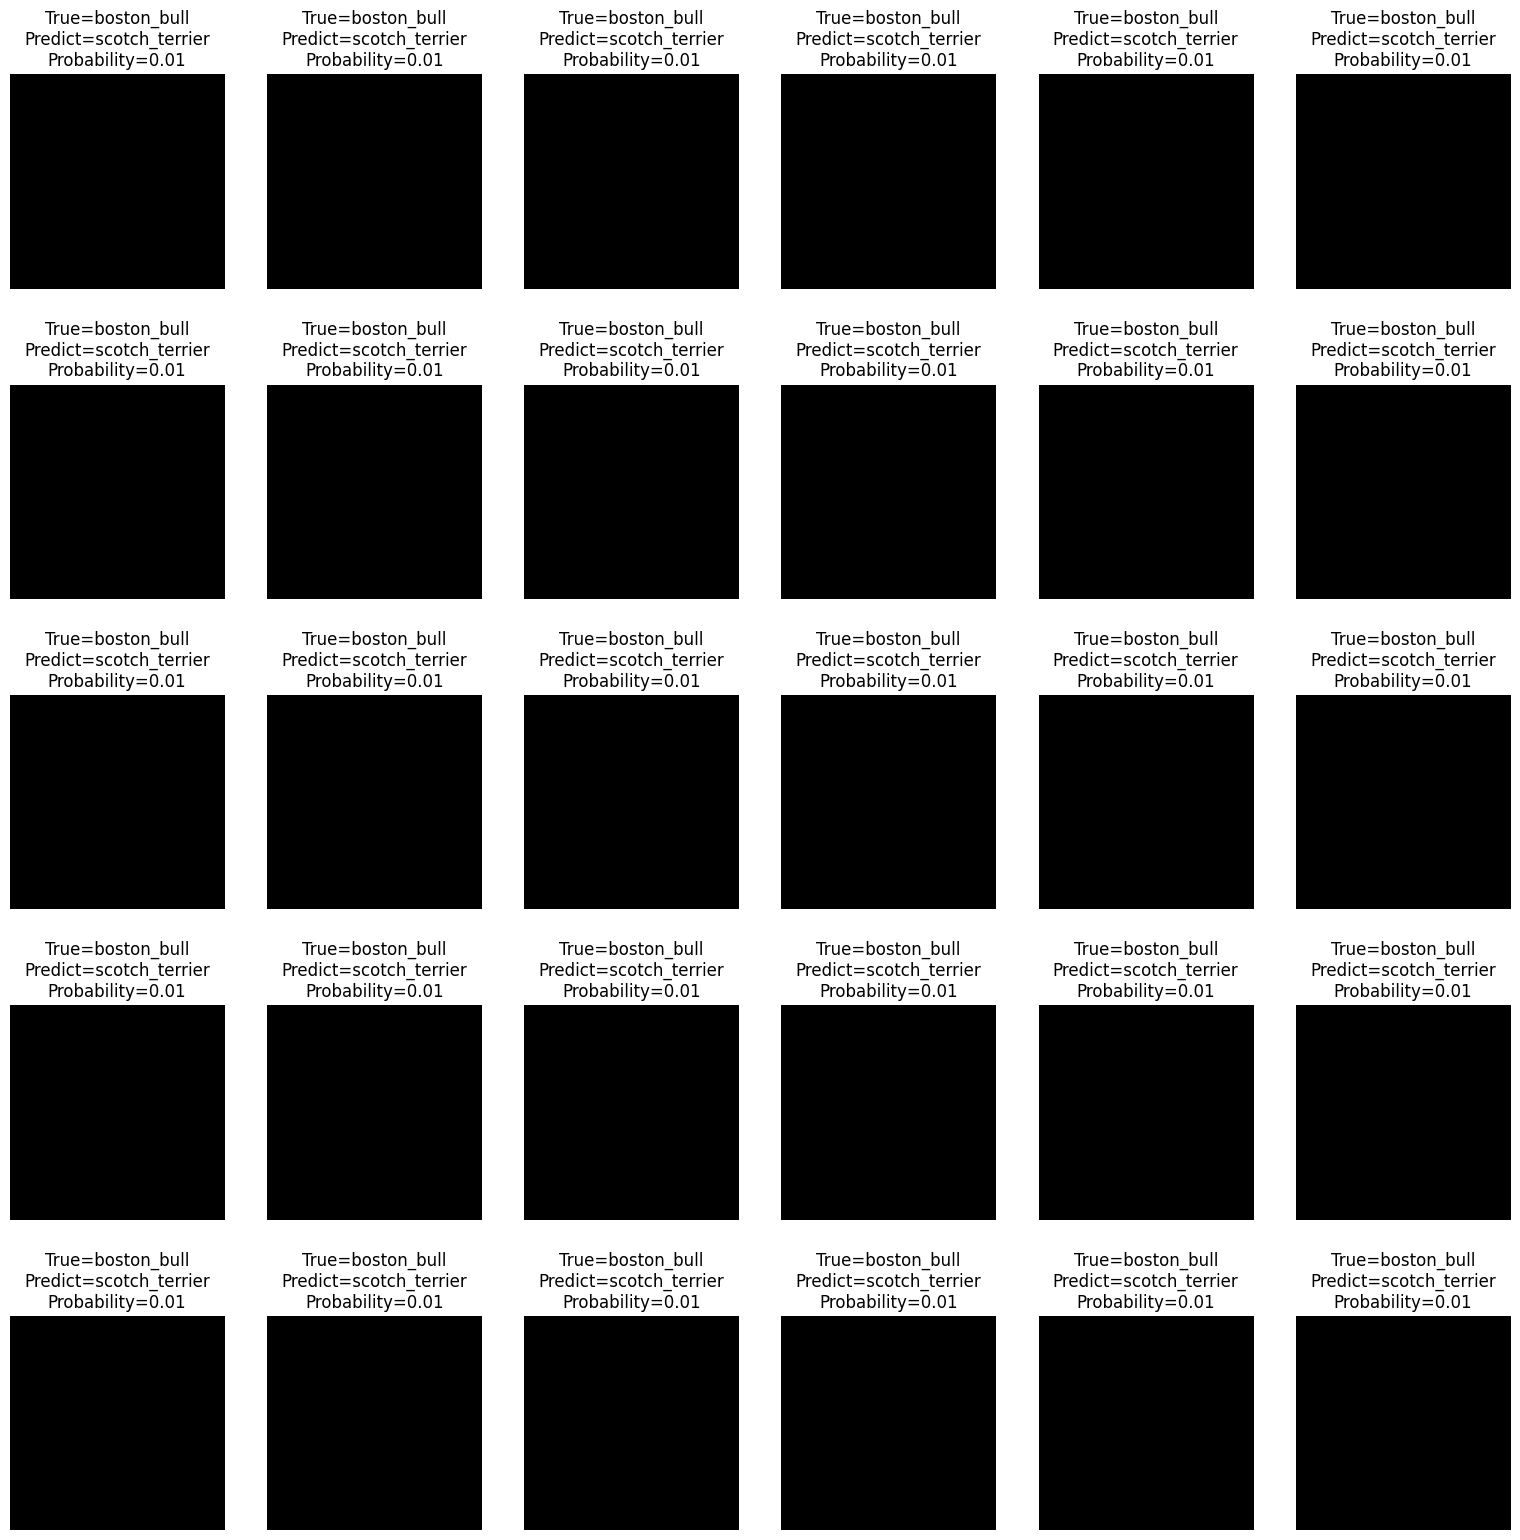

In [49]:
row = 5
column = 6

fig, ax = plt.subplots(row, column)
fig.set_size_inches(15, 15)

index = 0
for m in range(0, row):
    for n in range(0, column):
        true_data = np.argmax(y_test[index])  # Get the true class label
        pred_data = predict[index]  # Get the predicted class label
        probability = round(pre[index][pred_data], 2)
        ax[m][n].axis("off")
        ax[m][n].set_title("True=" + str(lab[true_data]) + "\nPredict=" + str(lab[pred_data]) + "\nProbability=" + str(probability))
        ax[m][n].imshow(x_test[index])
        index += 1

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=0.20)
plt.show()

### import requests
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
from io import BytesIO
import tensorflow as tf

# Define the URL of the image
image_url = "https://www.dailypaws.com/thmb/KMJM_zupItmjx1g-tAAZ-7L-hbE=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/siberian-husky-100800827-2000-9449ca147e0e4b819bce5189c2411188.jpg"
# Load the image from the URL
response = requests.get(image_url)
image_path = Image.open(BytesIO(response.content))
image_resized_rgb = image_path.resize((224, 224)).convert('RGB')
image_array_rgb = np.array(image_resized_rgb)
image_scale_rgb = image_array_rgb.astype("float32") / 255.0
image_reshape_rgb = image_scale_rgb.reshape(1, 224, 224, 3)  
final_pred = model.predict(image_reshape_rgb)[0]
max_prob = np.argmax(final_pred)
results = lab  
my_predict = results[max_prob]
# myFont = ImageFont.truetype('/kaggle/input/hack-font/Hack-Bold.ttf',8)
image_draw = ImageDraw.Draw(image_resized_rgb)
image_draw.text((10, 10), f"Predicted class: {my_predict}", fill=(255, 20, 30))
image_resized_rgb.save("my_image.png")
plt.figure(figsize=(8, 8))
plt.imshow(image_resized_rgb)
plt.axis("off")
plt.show()